In [54]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import  metrics
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from matplotlib import pyplot as plt
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
#import warnings
#warnings.filterwarnings('ignore')

In [55]:
#----------Load the data----------------------------
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X, y ,class_name = iris.data, iris.target , iris.target_names
df = pd.DataFrame(X , columns= ['sepal length', 'sepal width', 'petal length', 'petal width'])
df['target_class' ] = y 
df.head()


,sepal length,sepal width,petal length,petal width,target_class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [56]:
df['label_name']=0
for i in range(len(df['target_class'])):
  df['label_name'][i] = class_name[df['target_class'][i]]
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,sepal length,sepal width,petal length,petal width,target_class,label_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [57]:
#--------------Dropping the last two features then split data into train&test--------------
X_new = X[:,0:2]
x_train, x_tast, y_train, y_test = train_test_split(X_new, y, random_state=0)


df_new = pd.DataFrame(X_new , columns= ['sepal length', 'sepal width'])
df_new['target_class'] = y
df_new.head()

,sepal length,sepal width,target_class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


functions

In [58]:
#-------------------plotting Results-----------------------------------------------------------
def getAccuracy(model, x_test, y_test):
  return model.score(x_test,y_test)*100
  
def Results(model , x_test1 ,y_test1 , y_pred):
  print('Accuracy of per_model: {:.2f}%'.format(getAccuracy(model, x_test1, y_test1)))
  print('\nClassification Report:\n')
  print(classification_report(y_test1, y_pred))

  print('\nConfusion Matrix:\n')
  plot_confusion_matrix(model, x_test1, y_test1)
  
#-----------------------------------------plot decision_Boundary------------------------------------------  
def plotDecisionBoundary( X, y, est, title=''):
  plt.close('all')
  plt.figure()
  cm = plt.cm.Set1
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  h = 0.02
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
  Z = est.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
  plt.scatter(
      X[:, 0],
      X[:, 1],
      c=y,
      cmap=cm,
      edgecolors='k',
      alpha=1,
      #Label ={0:'ff' , 1:'cf' ,2:'fsf'}
  )
  plt.title(title)
  #plt.legend()
  #plt.savefig(filepath)
#--------------------------------------------------------------------------------------------------------------------    
class BayesianDecisionTheoryClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, estimator, utilityMat):
        self.estimator = estimator
        self.utilityMat = utilityMat

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.estimator_ = clone(self.estimator).fit(X, y)
        return self

    def predict_proba(self, X):
        check_is_fitted(self)
        prob = self.estimator_.predict_proba(X)
        probList = [(prob * self.utilityMat[index]).sum(axis=1).reshape((-1, 1))
                    for index, c in enumerate(self.classes_)]
        prob = np.hstack(probList)
        return prob

    def predict(self, X):
        pred = self.predict_proba(X).argmin(axis=1)
        return self.classes_[pred]
#________________________________________________________________________________________________________
def plot3dProb(
        X,
        est,
        title='',
):
    plt.close('all')
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.zaxis.set_tick_params(labelsize=10)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = est.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    for index in [0, 1, 2]:
        zz = Z[:, index].reshape(xx.shape)
        ax.plot_surface(xx, yy, zz, label=f'Class {index}', alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    #plt.savefig(filepath)
    # plt.show()        
#------------------------------------ To represent classes as names ------------------------------------------
def get_class_name(predicted_label):
  class_names=[]
  for i in range(len(predicted_label)):
    class_names.append(class_name[predicted_label[i]])  
  return class_names      

## Tuning the hyperparameters

In [59]:
#-----------------------Tuning the hyperparameters of naive bais ---------------------------------
nb = GaussianNB()
nb.fit(x_train ,y_train)
#y_pred_train = nb.predict(x_train)
#y_pred = nb.predict(x_tast)

#tr =

nb1 = GaussianNB(priors=None, var_smoothing=1e-08)
nb1.fit(x_train ,y_train)
nb2 = GaussianNB(var_smoothing= 1e-07)
nb2.fit(x_train ,y_train)

#accuracy = metrics.accuracy_score(y_train, x_train.flatten())
#tr

GaussianNB(priors=None, var_smoothing=1e-07)

In [60]:
#---------------------Get predictions from training and testing with tuning the hyperparameters------------------------
y_pred_train = nb.predict(x_train)
y_pred1_train = nb1.predict(x_train)
y_pred2_train = nb2.predict(x_train)

y_pred = nb.predict(x_tast)
y_pred1 = nb1.predict(x_tast)
y_pred2 = nb2.predict(x_tast)

get_class_name(y_pred)

['versicolor',
 'versicolor',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'virginica',
 'versicolor',
 'versicolor',
 'virginica',
 'versicolor',
 'virginica',
 'versicolor',
 'setosa',
 'versicolor',
 'versicolor',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'setosa',
 'setosa',
 'versicolor',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'setosa',
 'virginica',
 'versicolor',
 'setosa',
 'versicolor',
 'virginica',
 'versicolor',
 'setosa',
 'versicolor']

In [61]:
 #-----------------------------------train_accuracy-------------------------------------------------
AcT1 = metrics.accuracy_score(y_train, y_pred_train)*100
AcT2 = metrics.accuracy_score(y_train, y_pred1_train)*100
AcT3 = metrics.accuracy_score(y_train, y_pred2_train)*100
#----------------------------------test_accuracy-------------------------------------------------
Acuracy1 = ((y_test == y_pred).sum()/x_tast.shape[0])*100
Acuracy2 = ((y_test == y_pred1).sum()/x_tast.shape[0])*100
Acuracy3 = ((y_test == y_pred2).sum()/x_tast.shape[0])*100


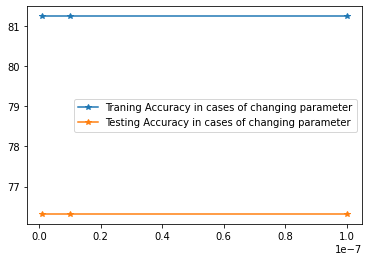

In [62]:
#-------------------------plotting the accuracy & var_smoothing curve-----------------------------
va_smoth = [1e-09,1e-08,1e-07]
Acc_train = [AcT1 ,AcT2,AcT3]
Ac_test = [Acuracy1,Acuracy2,Acuracy3]
plt.plot(va_smoth,Acc_train ,Label = 'Traning Accuracy in cases of changing parameter' ,marker='*')
plt.plot(va_smoth,Ac_test ,Label = 'Testing Accuracy in cases of changing parameter' , marker='*')
#plt.scatter(va_smoth ,Acc_train , marker='*')
#plt.scatter(va_smoth ,Ac_test , marker='*')
plt.legend()
plt.show()

## *7. Plot decision boundary and calculate precision, recall and accuracy for training and testing set*
## 

Accuracy of per_model: 81.25%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.68      0.74      0.70        34
           2       0.77      0.73      0.75        41

    accuracy                           0.81       112
   macro avg       0.81      0.81      0.81       112
weighted avg       0.82      0.81      0.81       112


Confusion Matrix:



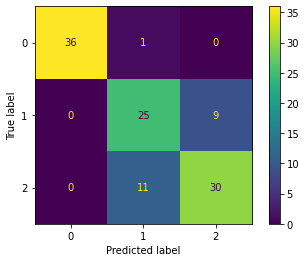

In [63]:
#-------------graph_results for training in naive bais model---------------------------------
Results(nb ,x_train ,y_train , y_pred_train)

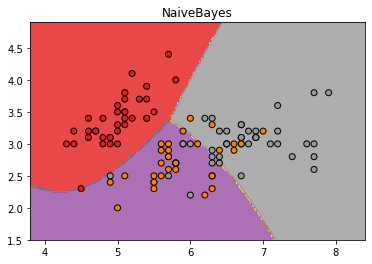

In [64]:
#----------desition_boundaries for training-----------------------
plotDecisionBoundary(x_train, y_train, nb, 'NaiveBayes')

Accuracy of per_model: 76.32%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.71      0.75      0.73        16
           2       0.50      0.44      0.47         9

    accuracy                           0.76        38
   macro avg       0.74      0.73      0.73        38
weighted avg       0.76      0.76      0.76        38


Confusion Matrix:



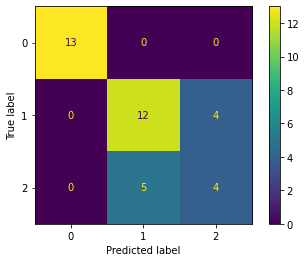

In [65]:
#-------------graph_results for testing in naive bais model---------------------------------
Results(nb ,x_tast ,y_test ,y_pred )

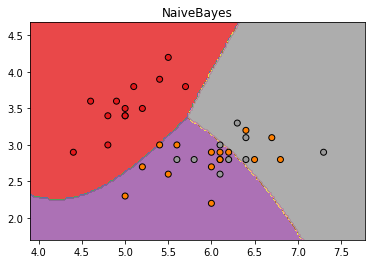

In [66]:
#----------desition_boundaries for testing-----------------------
plotDecisionBoundary(x_tast, y_test, nb, 'NaiveBayes')

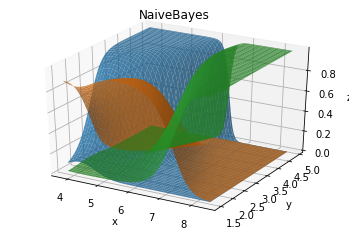

In [67]:
plot3dProb( x_train, nb, 'NaiveBayes')

## Risk-based Bayesian Decision Theory Classifier

In [68]:
Risk_mat = np.array([
        [-10, -5,-5],
        [-5, -10, -5],
        [-5, -5, -100],
    ])
bdtc = BayesianDecisionTheoryClassifier(nb, Risk_mat)
bdtc.fit(x_train,y_train)
yPred_bdtc = bdtc.predict(x_tast)
yPred_train_bdtc = bdtc.predict(x_train)


Accuracy of per_model: 66.07%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        37
           1       0.50      0.03      0.06        34
           2       0.53      1.00      0.69        41

    accuracy                           0.66       112
   macro avg       0.68      0.63      0.56       112
weighted avg       0.67      0.66      0.58       112


Confusion Matrix:



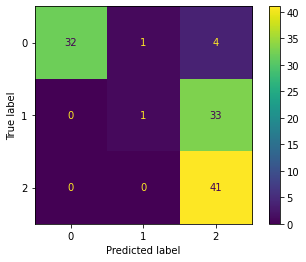

In [69]:
Results(bdtc ,x_train ,y_train ,yPred_train_bdtc)

Accuracy of per_model: 57.89%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      0.06      0.12        16
           2       0.36      1.00      0.53         9

    accuracy                           0.58        38
   macro avg       0.79      0.66      0.54        38
weighted avg       0.85      0.58      0.50        38


Confusion Matrix:



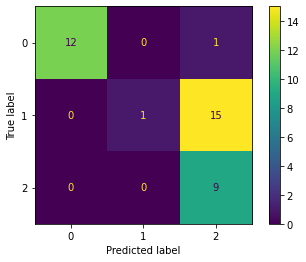

In [70]:
Results(bdtc ,x_tast ,y_test ,yPred_bdtc)
#len(yPred_bdtc)

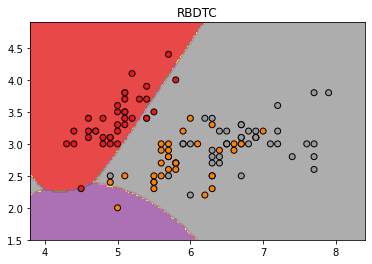

In [71]:
plotDecisionBoundary(x_train, y_train, bdtc, 'RBDTC')

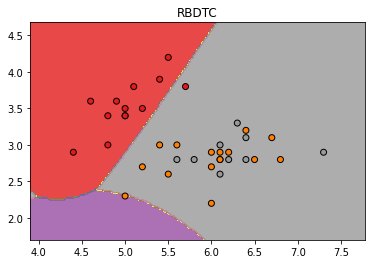

In [72]:
plotDecisionBoundary(x_tast, y_test, bdtc, 'RBDTC')

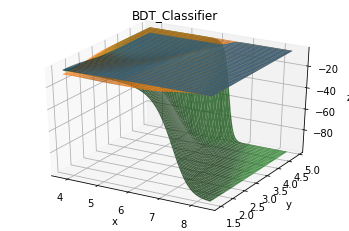

In [73]:
plot3dProb( x_train, bdtc, 'BDT_Classifier')